In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Load the dataset
df = pd.read_csv('C:/Users/ayesh/Documents/fourth sem notes/FDS/archive/survey.csv')  

In [11]:
print(df.shape)

(1259, 27)


In [12]:
print(df.head())


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [13]:
# Drop columns not needed for modeling
df = df.drop(columns=['Timestamp', 'comments', 'state', 'Country'])


In [14]:
# Handle missing values
df = df.dropna()


In [15]:
#Encode categorical features
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])


In [16]:
# Define features and target
X = df.drop('treatment', axis=1)
y = df['treatment'] 

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# Predictions
y_pred = model.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))

[[ 66  42]
 [ 19 167]]


In [21]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.78      0.61      0.68       108
           1       0.80      0.90      0.85       186

    accuracy                           0.79       294
   macro avg       0.79      0.75      0.76       294
weighted avg       0.79      0.79      0.79       294



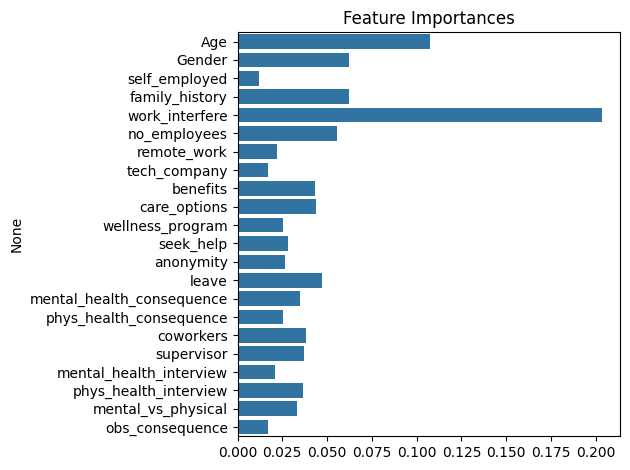

In [22]:
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

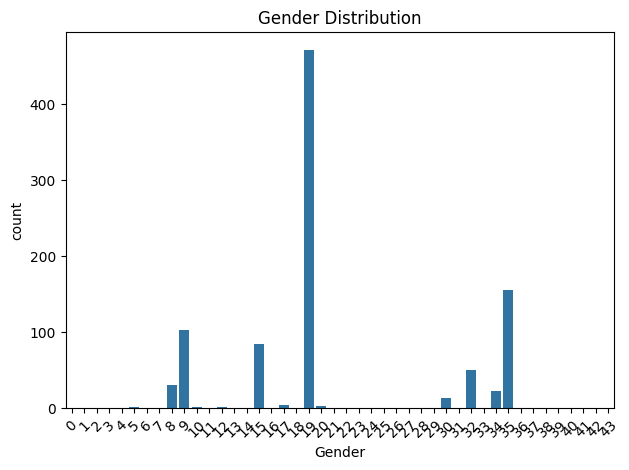

In [23]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


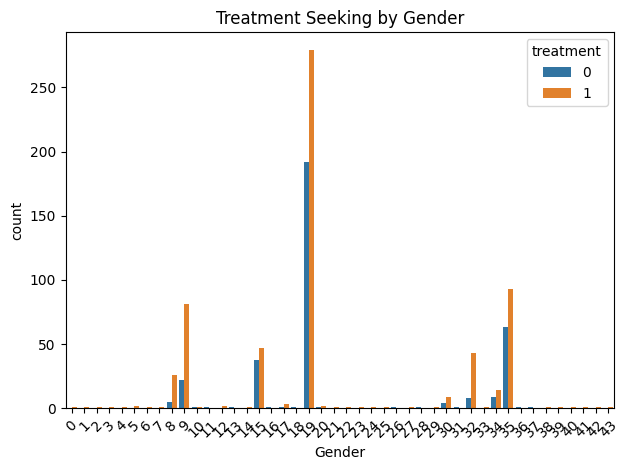

In [24]:
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Treatment Seeking by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


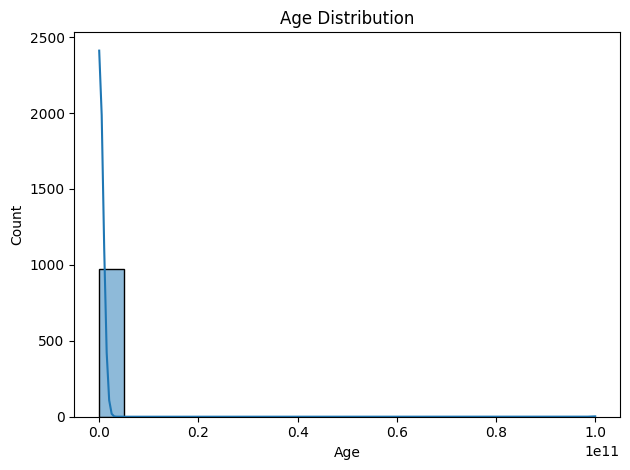

In [25]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


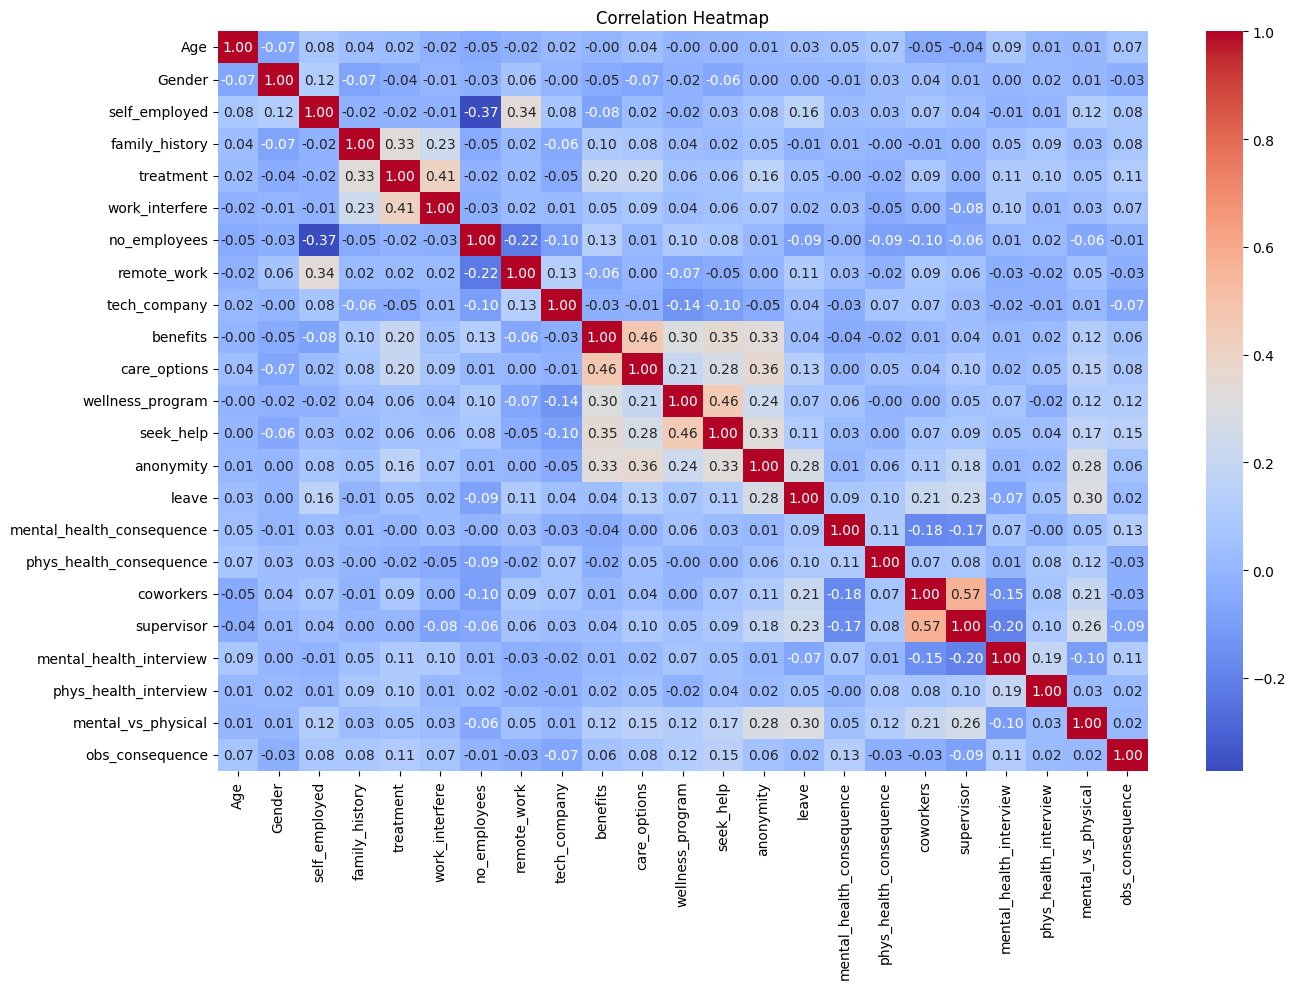

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


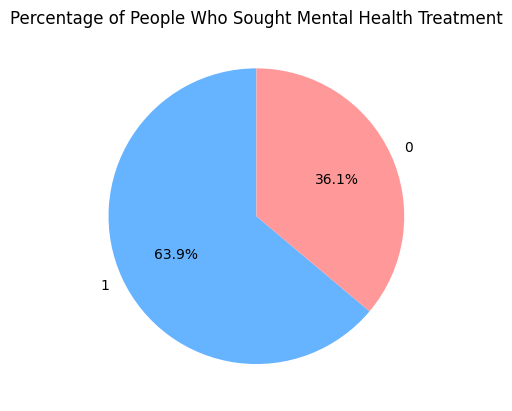

In [27]:
df['treatment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Percentage of People Who Sought Mental Health Treatment')
plt.ylabel('')
plt.show()


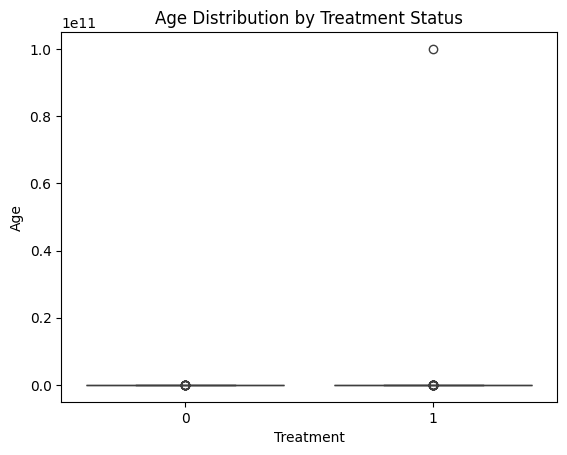

In [28]:
sns.boxplot(data=df, x='treatment', y='Age')
plt.title("Age Distribution by Treatment Status")
plt.xlabel("Treatment")
plt.ylabel("Age")
plt.show()


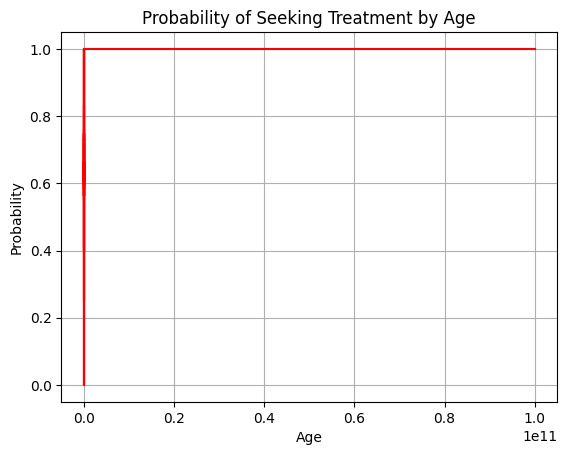

In [29]:
age_treatment = df.groupby('Age')['treatment'].value_counts(normalize=True).unstack().fillna(0)
age_treatment[1].plot(kind='line', color='red')
plt.title("Probability of Seeking Treatment by Age")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.grid()
plt.show()


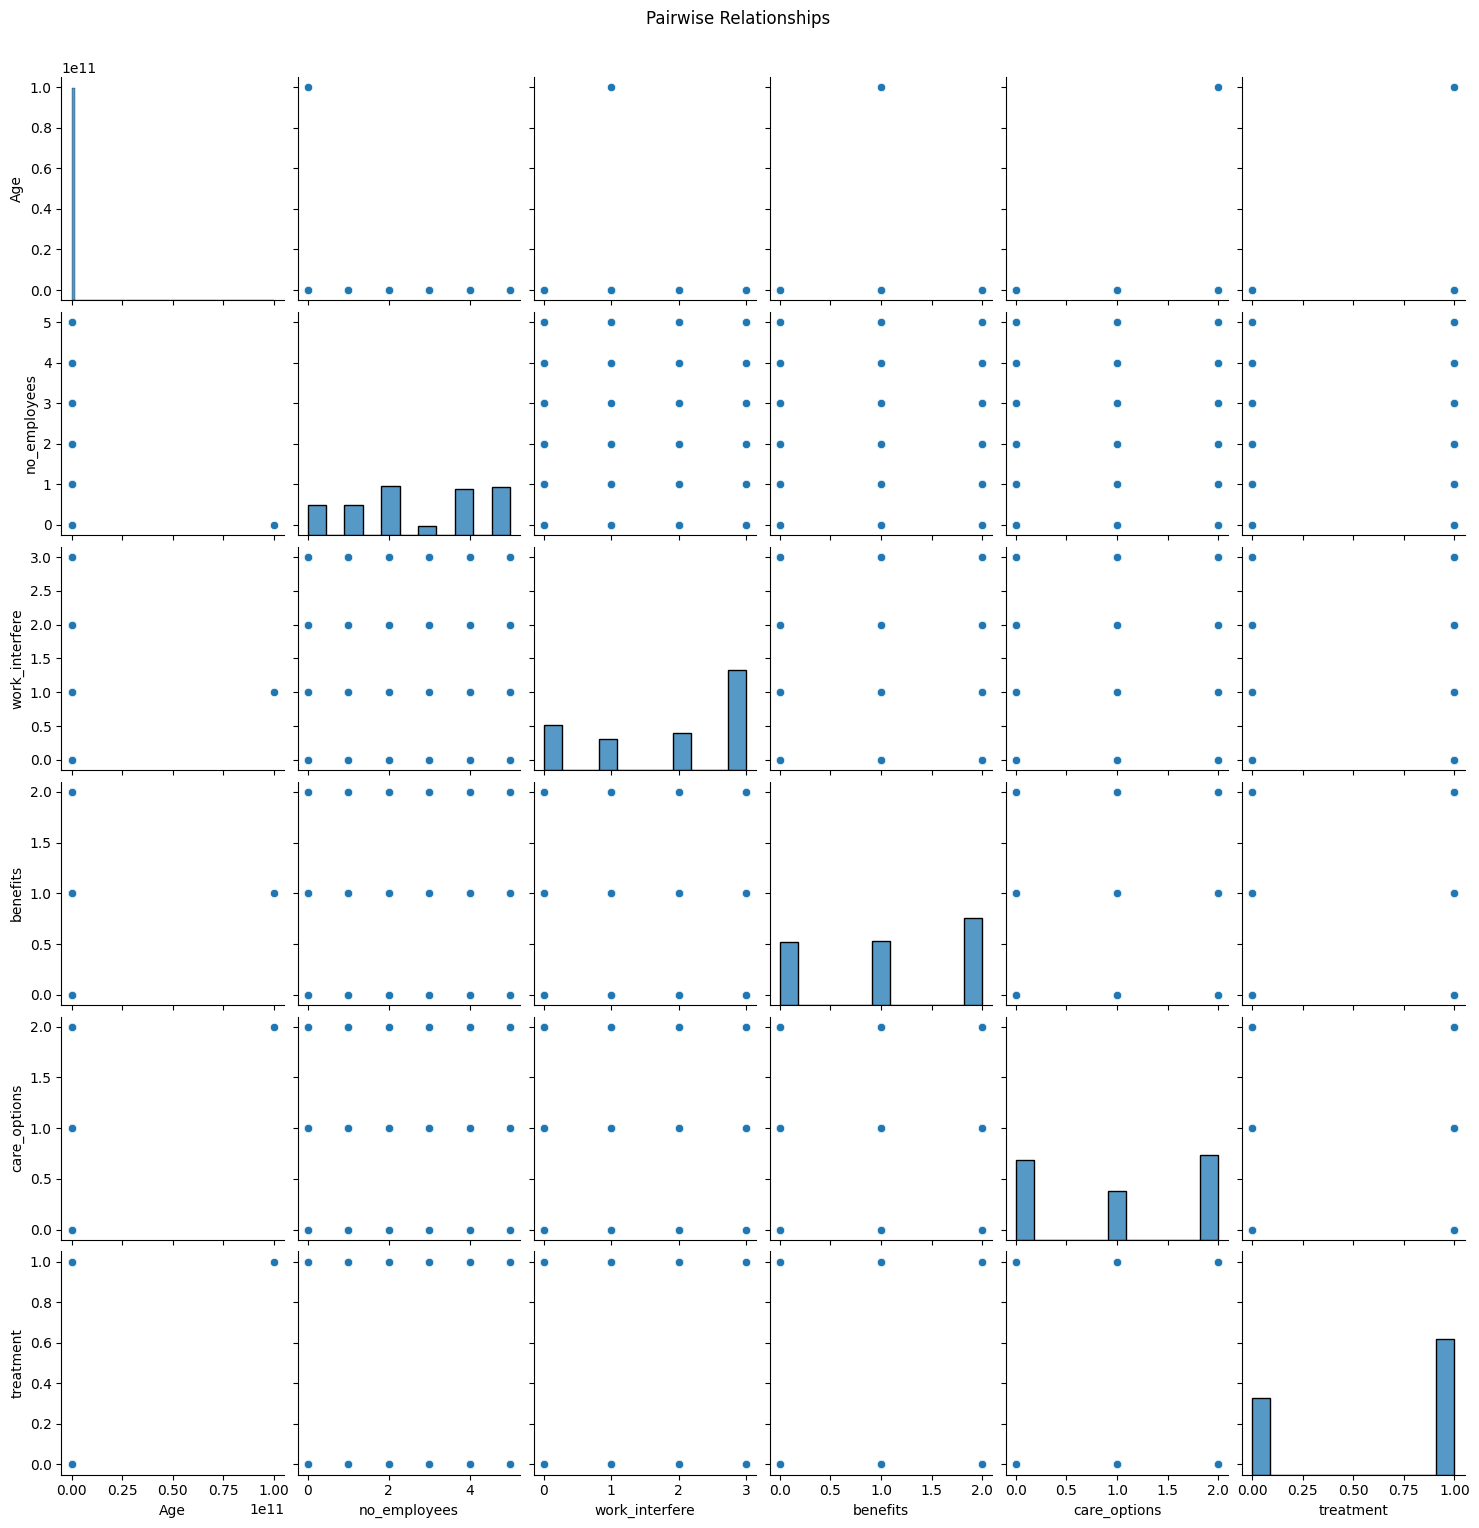

In [30]:
encoded_df = df.copy()
for col in encoded_df.select_dtypes('object').columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

sns.pairplot(encoded_df[['Age', 'no_employees', 'work_interfere', 'benefits', 'care_options', 'treatment']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


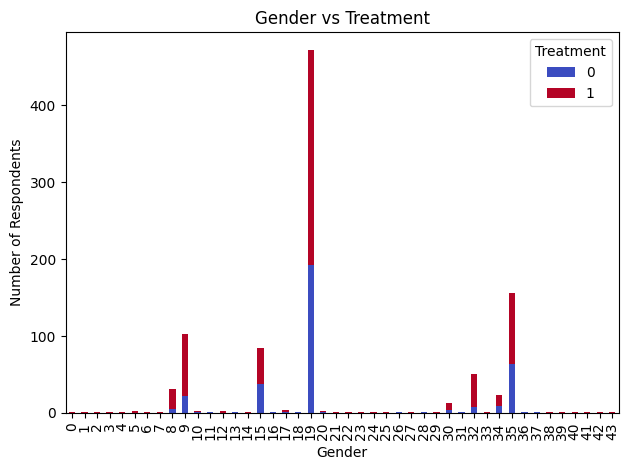

In [31]:
gender_treatment = pd.crosstab(df['Gender'], df['treatment'])
gender_treatment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Gender vs Treatment")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.legend(title="Treatment")
plt.tight_layout()
plt.show()
